In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

mpg = pd.read_csv('mpg.csv')

In [12]:
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

In [13]:
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 29, 42]

In [18]:
# Q1
# df.isin()에 []를 이용하여 조건 목록 입력
# -> 변수의 값이 입력한 목록에 확인하는 기능

# 먼저 이상치 있는지 확인
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
r     24
Name: count, dtype: int64

In [19]:
# drv가 4, f, r이면 기존 값 유지, 그 외 NaN 부여
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [20]:
# 이상치 확인
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
r     24
Name: count, dtype: int64

<Axes: ylabel='cty'>

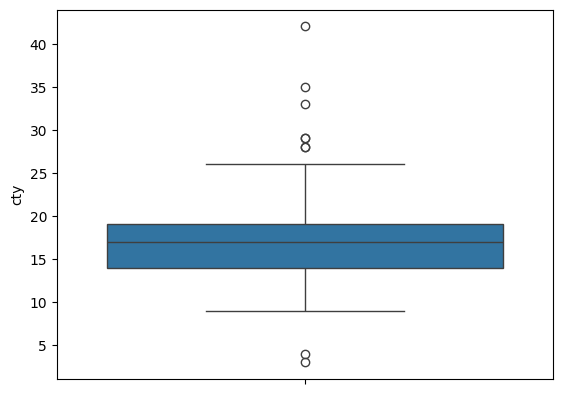

In [22]:
# Q2
sns.boxplot(data=mpg, y = 'cty')

In [39]:
# 극단치 기준값 구하기
# 1사분위수, 3사분위수 구하기
pct25 = mpg['cty'].quantile(.25)
pct25

np.float64(14.0)

In [40]:
pct75 = mpg['cty'].quantile(.75)
pct75

np.float64(19.0)

In [41]:
# IQR 구하기
iqr = pct75 - pct25
iqr

np.float64(5.0)

In [42]:
# 하한, 상한 구하기
pct25 - 1.5 * iqr

np.float64(6.5)

In [43]:
pct75 + 1.5 * iqr

np.float64(26.5)

In [46]:
# 극단치 결측 처리하기
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5),
                      np.nan, mpg['cty'])

In [47]:
# 결측치 빈도 확인
mpg['cty'].isna().sum()

np.int64(9)

<Axes: ylabel='cty'>

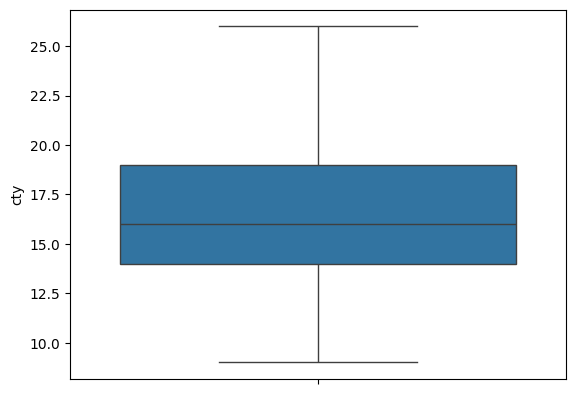

In [49]:
sns.boxplot(data=mpg, y='cty')

In [50]:
# 순서
# drv, cty 결측치 제거 -> drv별 분리, cty 평균 구하기
mpg.dropna(subset='cty')\
.groupby('drv')\
.agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
